In [37]:
import os
import numpy as np
from skimage import io, img_as_float, transform
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import scipy
from scipy import signal
import pandas as pd
import glob

plt.style.use('styleNB.mplstyle')

# Figure 3 related

The bulk of analysis was performed using the ImageJ Adapt plugin (Barry et al., Journal of Cell Biology 209, no. 1 (2015): 163–80. https://doi.org/10.1083/jcb.201501081) as described in the manuscript text. Here we summarize the kymograph data to generate the plots in the main text. 


## Average Galvanin signal

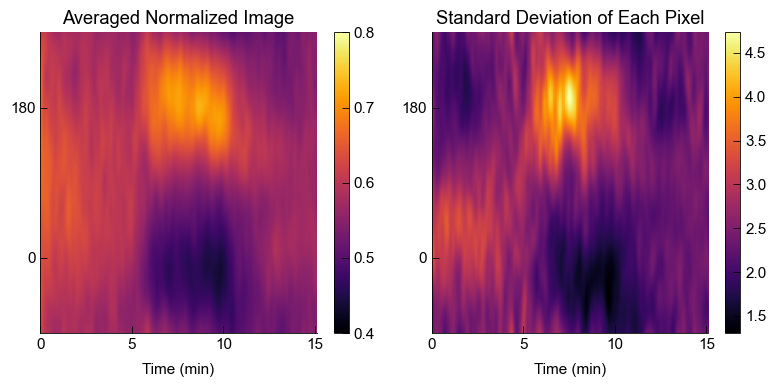

In [38]:
# Directory containing all the images
directory_path = ('/Volumes/ExpansionHomesA/Amy/Galvanin_data/Kymographs/Signals')

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(directory_path) if f.endswith('.tif')]

# Load the first image to get dimensions
first_image_path = os.path.join(directory_path, image_files[0])
first_image = io.imread(first_image_path)
first_image = img_as_float(first_image)

# Define target dimensions
target_height, target_width = 360, 181

# Initialize an array to store normalized pixel intensities
normalized_pixel_intensity_sum = np.zeros((target_height, target_width), dtype=np.float64)

# Iterate through each image
for image_file in image_files:
    # Load the original image
    image_path = os.path.join(directory_path, image_file)
    image = io.imread(image_path)
    image = img_as_float(image)

    # Normalize intensities
    normalized_image = image / image.max()

    # Resize image to target dimensions
    resized_image = transform.resize(normalized_image, (target_height, target_width))

    # Add normalized pixel intensities to the sum
    normalized_pixel_intensity_sum += resized_image

# Calculate the average normalized pixel intensity
average_normalized_pixel_intensity = normalized_pixel_intensity_sum / len(image_files)

# Calculate the standard deviation of each pixel across all images
pixel_std_deviation = np.std([transform.resize(img_as_float(io.imread(os.path.join(directory_path, f))), #[:, 0:120],
                                                (target_height, target_width))
                              for f in image_files], axis=0, dtype=np.float64)

# Create meshgrid for x-coordinates
x_coordinates = np.arange(1, target_width+1)

# Create meshgrid for normalized y-coordinates
normalized_y = np.linspace(0, 360, target_height)[:, np.newaxis]
x_mesh, y_mesh = np.meshgrid(x_coordinates, normalized_y)

# Plot the averaged normalized image
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(average_normalized_pixel_intensity, vmax = 0.8, vmin = 0.4, cmap='inferno', aspect='auto',
           extent=[0, target_width/ 12, -90, 270])
plt.title('Averaged Normalized Image')
plt.yticks(np.arange(0, 181, step=180))
plt.xticks(np.arange(0, 16, step=5))
plt.xlabel('Time (min)')
plt.colorbar(ticks=[0.4, 0.5, 0.6, 0.7, 0.8])

# cmap='inferno'

# Plot the standard deviation of each pixel
plt.subplot(1, 2, 2)
plt.imshow(pixel_std_deviation, cmap='inferno', aspect='auto', 
           extent=[0, target_width/ 12, -90, 270])
plt.title('Standard Deviation of Each Pixel')
plt.yticks(np.arange(0, 181, step=180))
plt.xticks(np.arange(0, 16, step=5))
plt.xlabel('Time (min)')
plt.colorbar()

plt.tight_layout()

In [39]:
# Define some useful position ranges for the front and back
# Because the pixels are defined with 0 at top and 360 at bottom (inverse of graphed), use these values
# Front y-values
degree_60 = 240
degree_120 = 300
# Back y-values
degree_240 = 60
degree_300 = 120

off_x_value = 0
on_x_value = 120

# Save values to another variable name
gfp_kymograph = average_normalized_pixel_intensity
gfp_kymo_std_dev = pixel_std_deviation

gfp_avg_front = np.mean(average_normalized_pixel_intensity[330-90:330,:121].T, axis = 1)

## Protrusion/retraction 'signal'

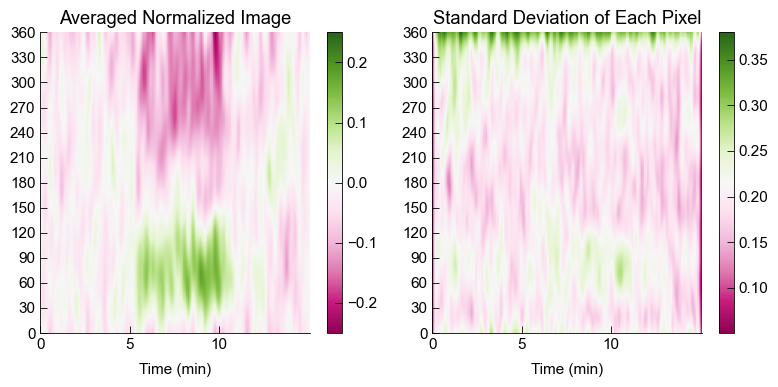

In [40]:
# Directory containing all the velocity kymographs
directory_path = '/Volumes/ExpansionHomesA/Amy/Galvanin_data/Kymographs/Velocity'

# Set vmax, -vmax for velocity plots
v_max = 3/12

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(directory_path) if f.endswith('.tif')]

# Load the first image to get dimensions
first_image_path = os.path.join(directory_path, image_files[0])
first_image = io.imread(first_image_path)
first_image = img_as_float(first_image)

# Define target dimensions
# target_height, target_width = 360, 121
target_height, target_width = 360, 181

# Initialize an array to store normalized pixel intensities
normalized_pixel_intensity_sum = np.zeros((target_height, target_width), dtype=np.float64)

# Iterate through each image
for image_file in image_files:
    # Load the original image
    image_path = os.path.join(directory_path, image_file)
    image = io.imread(image_path)
    image = img_as_float(image)

    # Resize image to target dimensions
    resized_image = transform.resize(image, (target_height, target_width))

    # Add normalized pixel intensities to the sum
    normalized_pixel_intensity_sum += resized_image

# Calculate the average normalized pixel intensity
average_normalized_pixel_intensity = normalized_pixel_intensity_sum / len(image_files)

# Calculate the standard deviation of each pixel across all images
pixel_std_deviation = np.std([transform.resize(img_as_float(io.imread(os.path.join(directory_path, f))),#[:, 0:120],
                                                (target_height, target_width))
                              for f in image_files], axis=0, dtype=np.float64)

# Create meshgrid for x-coordinates
x_coordinates = np.arange(1, target_width+1)

# Create meshgrid for normalized y-coordinates
normalized_y = np.linspace(0, 360, target_height)[:, np.newaxis]
x_mesh, y_mesh = np.meshgrid(x_coordinates, normalized_y)

# Plot the averaged normalized image
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(average_normalized_pixel_intensity, vmax=v_max, vmin = -v_max, 
           cmap='PiYG', aspect='auto', extent=[0, target_width/ 12, 0, 360])
plt.title('Averaged Normalized Image')
plt.yticks(np.arange(0, 361, step=30))
plt.xticks(np.arange(0, 11, step=5))
plt.xlabel('Time (min)')
plt.colorbar()

# Plot the standard deviation of each pixel
plt.subplot(1, 2, 2)
plt.imshow(pixel_std_deviation, cmap='PiYG', aspect='auto',
           extent=[0, target_width/12, 0, 360])
plt.title('Standard Deviation of Each Pixel')
plt.yticks(np.arange(0, 361, step=30))
plt.xticks(np.arange(0, 11, step=5))
plt.xlabel('Time (min)')
plt.colorbar()

plt.tight_layout()


In [41]:
# Save values to another variable name
v_kymograph = average_normalized_pixel_intensity
v_kymo_std_dev = pixel_std_deviation

v_avg_front = np.mean(average_normalized_pixel_intensity[degree_60:degree_120,:121].T, axis = 1)

### Summary of Galvanin signal and speed values at front and rear of cell

In [42]:
# Front y-values
degree_60 = 210
degree_120 = 330
# Back y-values
degree_240 = 30
degree_300 = 150

# gfp_kymograph = average_normalized_pixel_intensity
gfp_avg_front = np.mean(gfp_kymograph[degree_60:degree_120,:121].T, axis = 1)
gfp_avg_rear =  np.mean(gfp_kymograph[degree_240:degree_300,:121].T, axis = 1)

# v_kymograph = average_normalized_pixel_intensity
v_avg_front = np.mean(v_kymograph[degree_60:degree_120,:121].T, axis = 1)
v_avg_rear = np.mean(v_kymograph[degree_240:degree_300,:121].T, axis = 1)

In [43]:
num_colors = 10

# Get the 'PiYG' colormap
cmap = cm.get_cmap('PiYG', 10)
# Extract the colors
c_PiYG = cmap(range(num_colors))


# Get the 'PiYG' colormap
cmap = cm.get_cmap('inferno', 10)
# Extract the colors
c_inferno = cmap(range(num_colors))

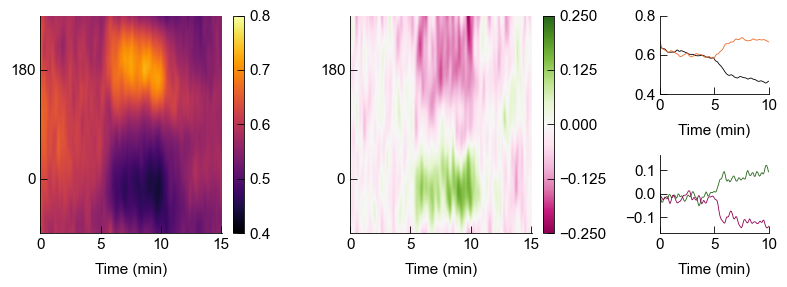

In [44]:
# Create a figure
fig = plt.figure(figsize=(8, 3))

# Create a GridSpec with 2 rows and 3 columns
gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 1.5], height_ratios=[1, 1])

# Add subplots
ax1 = fig.add_subplot(gs[:, :2])  # First row, first column
ax2 = fig.add_subplot(gs[:, 2:4])  # First row, span across second and third columns
ax3 = fig.add_subplot(gs[0, 4])  # Second row, span across first and second columns
ax4 = fig.add_subplot(gs[1, 4])  # Second row, third column

target_height, target_width = 360, 181
v_max = 0.8
v_min = 0.4

img_gfp = ax1.imshow(gfp_kymograph, vmax=v_max, vmin = v_min, 
           cmap='inferno', aspect='auto', 
                     extent=[0, target_width/ 12, -90, 270])
ax1.set_yticks(np.arange(0, 181, step=180))
# ax1.set_yticks(np.arange(0, 361, step=30))
ax1.set_xticks(np.arange(0, 16, step=5))
ax1.set_xlabel('Time (min)')


# Add colorbar to ax2
cbar = fig.colorbar(img_gfp, ax=ax1, orientation='vertical',
                   ticks = [0.4, 0.5, 0.6,0.7, 0.8])

# Set vmax, -vmax for velocity plots
v_max = 3/12

img_v = ax2.imshow(v_kymograph, vmax=v_max, vmin = -v_max, 
           cmap='PiYG', aspect='auto', 
                     extent=[0, target_width/ 12, -90, 270])
ax2.set_yticks(np.arange(0, 181, step=180))
ax2.set_xticks(np.arange(0, 16, step=5))
ax2.set_xlabel('Time (min)')
# Add colorbar to ax2
cbar = fig.colorbar(img_v, ax=ax2, orientation='vertical',
                   ticks = [-0.25, -0.125 ,0 , 0.125, 0.25])


x = np.arange(121)*5/60
ax3.plot(x, gfp_avg_front, color = c_inferno[0])
ax3.plot(x, gfp_avg_rear, color = c_inferno[-4])
ax3.set_ylim(0.4,0.8)
ax3.set_xlim(0,10)
ax3.set_xticks(np.arange(0, 11, step=5))
ax3.set_xlabel('Time (min)')

ax4.plot(x, v_avg_front, color = c_PiYG[-1])
ax4.plot(x, v_avg_rear, color = c_PiYG[0])
ax4.set_ylim(-2/12,2/12)
ax4.set_xlim(0,10)
ax4.set_xticks(np.arange(0, 11, step=5))
ax4.set_xlabel('Time (min)')


plt.tight_layout()

## Cross-correlation analysis

In [45]:
def cross_correlation(x, y):
    m = len(x)
    corr = np.correlate(x - x.mean(), y - y.mean(), mode='full') / (m * x.std() * y.std())
    return corr

def max_cross_correlation(x, y):
    corr = cross_correlation(x, y)
    return np.max(corr)

def bootstrap_max_cross_corr(x, y, num_iterations=2000, ci_percentile=95):
    max_corrs = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        permuted_x = np.random.permutation(x)
        permuted_y = np.random.permutation(y)
        max_corrs[i] = max_cross_correlation(permuted_x, permuted_y)
    
    lower_bound = np.percentile(max_corrs, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(max_corrs, 100 - (100 - ci_percentile) / 2)
    
    return lower_bound, upper_bound


In [46]:
### BACK

# Slice the array to keep only the specified x-coordinates
off_on_sig = gfp_kymograph[degree_240:degree_300, off_x_value:on_x_value]
off_on_sd = gfp_kymo_std_dev[degree_240:degree_300, off_x_value:on_x_value]

# Slice the array to keep only the specified x-coordinates
off_on_vel = v_kymograph[degree_240:degree_300, off_x_value:on_x_value]
off_on_sd_vel = v_kymo_std_dev[degree_240:degree_300, off_x_value:on_x_value]

# Calculate the average intensity along columns
average_intensity = np.mean(off_on_sig, axis=0)

# Calculate the standard deviation of intensity along columns
average_velocity = np.mean(off_on_vel, axis=0)
    
# calculate correlation    
corr_back = cross_correlation(average_intensity, average_velocity)

# corr = pd.DataFrame(corr)
lags_back = signal.correlation_lags(len(average_velocity), len(average_intensity))
lags_back = lags_back/12

ci_lower_back, ci_upper_back = bootstrap_max_cross_corr(average_intensity, average_velocity, ci_percentile = 99.9)


### FRONT

# Slice the array to keep only the specified x-coordinates
off_on_sig = gfp_kymograph[degree_60:degree_120, off_x_value:on_x_value]
off_on_sd = gfp_kymo_std_dev[degree_60:degree_120, off_x_value:on_x_value]

# Slice the array to keep only the specified x-coordinates
off_on_vel = v_kymograph[degree_60:degree_120, off_x_value:on_x_value]
off_on_sd_vel = v_kymo_std_dev[degree_60:degree_120, off_x_value:on_x_value]

# Calculate the average intensity along columns
average_intensity = np.mean(off_on_sig, axis=0)

# Calculate the standard deviation of intensity along columns
average_velocity = np.mean(off_on_vel, axis=0)
    
# calculate correlation    
corr_front = cross_correlation(average_intensity, average_velocity)

# corr = pd.DataFrame(corr)
lags_front = signal.correlation_lags(len(average_velocity), len(average_intensity))
lags_front = lags_front/12

ci_lower_front, ci_upper_front = bootstrap_max_cross_corr(average_intensity, average_velocity, ci_percentile = 99.9)


In [47]:
# Find the maximum correlation value and plot the coordiantes on the graph.
# Change "argmax" to "argmin" if the two arrays are more greatly negatively correlated.
def find_min_coordinates(x, y):
    max_index = np.argmin(y)  # Find the index of the maximum value in y
    max_x = x[max_index]      # Get the x value corresponding to the maximum y value
    max_y = y[max_index]      # Get the maximum y value
    return max_x, max_y

max_x, max_y = find_min_coordinates(lags_front, corr_front)
print("FRONT: Coordinates of min y value: ({}, {})".format(max_x, max_y))

max_x, max_y = find_min_coordinates(lags_back, corr_back)
print("REAR: Coordinates of min y value: ({}, {})".format(max_x, max_y))

FRONT: Coordinates of min y value: (0.0, -0.9465768570915852)
REAR: Coordinates of min y value: (0.16666666666666666, -0.8860859017878641)


## Single cell analysis Galvanin and protrusion/retraction signals - calculate lag with max correlation

In [48]:
# Directory containing all of the signal kymographs
directory_path = '/Volumes/ExpansionHomesA/Amy/Galvanin_data/Kymographs/Signals'

# Directory containing all the velocity kymographs
directory_path2 = '/Volumes/ExpansionHomesA/Amy/Galvanin_data/Kymographs/Velocity'

# Get a list of all image files in the directories
image_files_sig = [f for f in os.listdir(directory_path) if f.endswith('.tif')]
image_files_vel = [f for f in os.listdir(directory_path2) if f.endswith('.tif')]

# Define target dimensions
target_height, target_width = 360, 121

# List to store the max coordinates
max_coordinates = []

# Define the range of x-values to keep (60-120)
off_x_value = 0
on_x_value = 120
on2_x_value = 61
off2_x_value = 181

# Front y-values
degree_60 = 210
degree_120 = 330
# Back y-values
degree_240 = 30
degree_300 = 150


# Function to process an image
def process_image(image_path, crop_cols, target_height, target_width):
    image = io.imread(image_path)
    image = img_as_float(image)
    image = image[:, :crop_cols]  # Crop the image to keep specified columns and all rows
    resized_image = transform.resize(image, (target_height, target_width))
    return resized_image

#########################
# Cell rear
#########################

# Iterate through each signal image
for image_file_sig in image_files_sig:
    # Extract the common part of the file name
    common_name = image_file_sig.rsplit('_', 1)[0]

    # Find the corresponding velocity image
    image_file_vel = next((f for f in image_files_vel if f.startswith(common_name)), None)

    if image_file_vel:
        
        # Galvanin SIGNAL
        # Process signal image
        image_path_sig = os.path.join(directory_path, image_file_sig)
        sig_image = process_image(image_path_sig, 120, target_height, target_width)

        # Slice the array to keep only the specified x- and y-coordinates
        off_on_sig = sig_image[:, off_x_value:on_x_value]
        back_off_on_sig = off_on_sig[degree_240:degree_300, :]
        img = back_off_on_sig
        average_intensity = np.mean(img, axis=0)

        # Protrusion/retraction speed
        # Process speed kymograph
        image_path_vel = os.path.join(directory_path2, image_file_vel)
        vel_image = process_image(image_path_vel, 120, target_height, target_width) * 12

        # Slice the array to keep only the specified x-coordinates
        off_on_vel = vel_image[:, off_x_value:on_x_value]
        
        # Slice the array to keep only the specified y-coordinates
        back_off_on_vel = off_on_vel[degree_240:degree_300, :]
        
        # Assuming img is your image with shape (60, 120)
        img2 = back_off_on_vel
        
        # Calculate the average velocity along columns
        average_velocity = np.mean(img2, axis=0)

        # Calculate correlation
        corr = cross_correlation(average_intensity, average_velocity)
        lags = signal.correlation_lags(len(average_velocity), len(average_intensity))
        lags = lags / 12

        max_x, max_y = find_min_coordinates(lags, corr)
        max_coordinates.append([image_file_sig, image_file_vel, max_x, max_y])

max_coordinates_rear_df = pd.DataFrame(max_coordinates, columns=['Image File Sig', 'Image File Vel', 'Lags', 'Correlation'])

#########################
# Cell Front
#########################

max_coordinates = []

# Iterate through each signal image
for image_file_sig in image_files_sig:
    # Extract the common part of the file name
    common_name = image_file_sig.rsplit('_', 1)[0]

    # Find the corresponding velocity image
    image_file_vel = next((f for f in image_files_vel if f.startswith(common_name)), None)

    if image_file_vel:
        # Galvanin SIGNAL
        # Process signal image
        image_path_sig = os.path.join(directory_path, image_file_sig)
        sig_image = process_image(image_path_sig, 120, target_height, target_width)

        # Slice the array to keep only the specified x- and y-coordinates
        off_on_sig = sig_image[:, off_x_value:on_x_value]
        back_off_on_sig = off_on_sig[degree_60:degree_120, :]
        img = back_off_on_sig
        average_intensity = np.mean(img, axis=0)

        # Protrusion/retraction speed
        # Process speed image
        image_path_vel = os.path.join(directory_path2, image_file_vel)
        vel_image = process_image(image_path_vel, 120, target_height, target_width) * 12

        # Slice the array to keep only the specified x-coordinates
        off_on_vel = vel_image[:, off_x_value:on_x_value]
        
        # Slice the array to keep only the specified y-coordinates
        back_off_on_vel = off_on_vel[degree_60:degree_120, :]
        
        # Assuming img is your image with shape (60, 120)
        img2 = back_off_on_vel
        
        # Calculate the average velocity along columns
        average_velocity = np.mean(img2, axis=0)

        # Calculate correlation
        corr = cross_correlation(average_intensity, average_velocity)
        lags = signal.correlation_lags(len(average_velocity), len(average_intensity))
        lags = lags / 12

        max_x, max_y = find_min_coordinates(lags, corr)
        max_coordinates.append([image_file_sig, image_file_vel, max_x, max_y])
        
# # Save the max coordinates to a CSV file
max_coordinates_front_df = pd.DataFrame(max_coordinates, columns=['Image File Sig', 'Image File Vel', 'Lags', 'Correlation'])



In [49]:
max_coordinates_rear_df.Lags.mean()

0.36413043478260876

In [50]:
max_coordinates_front_df.Lags.mean()

0.1630434782608694

Text(0.5, 0, 'lags')

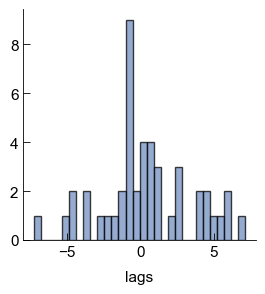

In [51]:
# cell rear

f = plt.figure(figsize = (3,3))
plt.hist(max_coordinates_rear_df.Lags.values, bins=30, alpha=0.75, edgecolor='black')
plt.xlabel('lags')

Text(0.5, 0, 'lags')

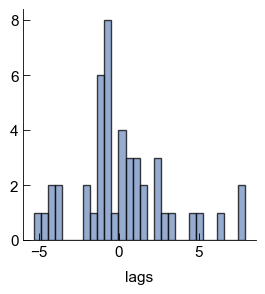

In [52]:
# cell front
f = plt.figure(figsize = (3,3))
plt.hist(max_coordinates_front_df.Lags.values, bins=30, alpha=0.75, edgecolor='black')
plt.xlabel('lags')

## Generate plot for Figure 3

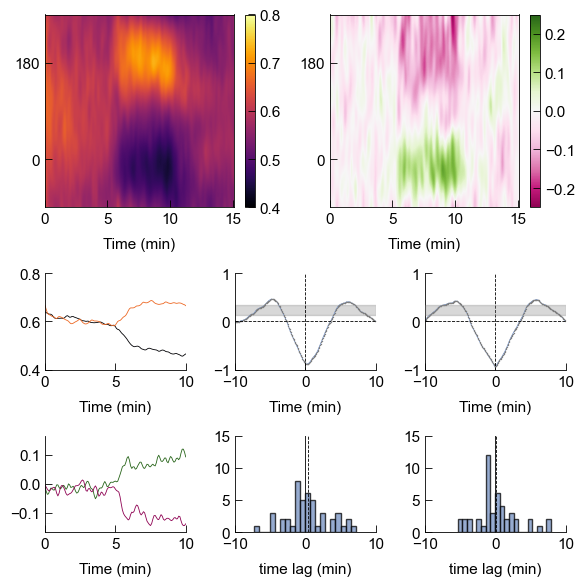

In [53]:
# Create a figure
fig = plt.figure(figsize=(6, 6))

# Create a GridSpec with 2 rows and 3 columns
gs = gridspec.GridSpec(3, 6, width_ratios=[1, 1, 1, 1, 1, 1], height_ratios=[2, 1, 1])

# Add subplots

ax_sig = fig.add_subplot(gs[0, :3])  
ax_vel = fig.add_subplot(gs[0, 3:])  

ax1 = fig.add_subplot(gs[1, :2])  
ax2 = fig.add_subplot(gs[2, :2]) 
ax3 = fig.add_subplot(gs[1, 2:4])  
ax4 = fig.add_subplot(gs[1, 4:]) 

ax5 = fig.add_subplot(gs[2, 2:4]) 
ax6 = fig.add_subplot(gs[2, 4:]) 

##################
##################

target_height, target_width = 360, 181
v_max = 0.8
v_min = 0.4

img_gfp = ax_sig.imshow(gfp_kymograph, vmax=v_max, vmin = v_min, 
           cmap='inferno', aspect='auto', 
                     extent=[0, target_width/ 12, -90, 270])
ax_sig.set_yticks(np.arange(0, 181, step=180))
# ax_sig.set_yticks(np.arange(0, 361, step=30))
ax_sig.set_xticks(np.arange(0, 16, step=5))
ax_sig.set_xlabel('Time (min)')

ax_sig.spines['top'].set_visible(True)
ax_sig.spines['right'].set_visible(True)

# Add colorbar to ax2
cbar = fig.colorbar(img_gfp, ax=ax_sig, orientation='vertical',
                   ticks = [0.4, 0.5, 0.6,0.7, 0.8])

# Set vmax, -vmax for velocity plots
v_max = 3/12

img_v = ax_vel.imshow(v_kymograph, vmax=v_max, vmin = -v_max, 
           cmap='PiYG', aspect='auto', 
                     extent=[0, target_width/ 12, -90, 270])
ax_vel.set_yticks(np.arange(0, 181, step=180))
ax_vel.set_xticks(np.arange(0, 16, step=5))
ax_vel.set_xlabel('Time (min)')

ax_vel.spines['top'].set_visible(True)
ax_vel.spines['right'].set_visible(True)

ax_vel.set_ylim(-90,270)

# Add colorbar to ax2
cbar = fig.colorbar(img_v, ax=ax_vel, orientation='vertical',
                   ticks = [-0.2,-0.1,0,0.1,0.2])


##################
##################


x = np.arange(121)*5/60
ax1.plot(x, gfp_avg_front, color = c_inferno[0])
ax1.plot(x, gfp_avg_rear, color = c_inferno[-4])
ax1.set_ylim(0.4,0.8)
ax1.set_xlim(0,10)
ax1.set_xticks(np.arange(0, 11, step=5))
ax1.set_xlabel('Time (min)')

##################
##################

ax2.plot(x, v_avg_front, color = c_PiYG[-1])
ax2.plot(x, v_avg_rear, color = c_PiYG[0])
ax2.set_ylim(-2/12,2/12)
ax2.set_xlim(0,10)
ax2.set_xticks(np.arange(0, 11, step=5))
ax2.set_xlabel('Time (min)')

##################
##################

ax3.plot(lags_back, corr_back, marker='o', markerfacecolor = 'grey', #markerfacecolor='mediumvioletred',
           markeredgewidth=0, markersize = 1)

ax3.set_ylim(-1.0,1)
ax3.set_xlim(-10,10)
ax3.set_xlabel('Time (min)')

ax3.axhspan(ci_lower_back, ci_upper_back, color='grey', alpha=0.3, label='Non-Significant Region (95% CI)')

ax3.hlines(0,-10,10, linewidth = 0.6, linestyle='--', color = 'k')
ax3.vlines(0,-1,1, linewidth = 0.6, linestyle='--', color = 'k')

# Customizing the x-axis
ax3.xaxis.set_ticks_position('bottom')
ax3.set_yticks([-1,0,1])
ax3.set_xticks([-10,0,10])

ax3.set_xlabel('Time (min)')
  
##################
##################
    
ax4.plot(lags_front, corr_front, marker='o', markerfacecolor = 'grey', #markerfacecolor='mediumvioletred',
           markeredgewidth=0, markersize = 1)

ax4.set_ylim(-1.0,1)
ax4.set_xlim(-10,10)
ax4.set_xlabel('Time (min)')

ax4.axhspan(ci_lower_front, ci_upper_front, color='grey', alpha=0.3, 
            label='Non-Significant Region (95% CI)', zorder = 3)

ax4.hlines(0,-10,10, linewidth = 0.6, linestyle='--', color = 'k')
ax4.vlines(0,-1,1, linewidth = 0.6, linestyle='--', color = 'k')

# Customizing the x-axis
ax4.set_yticks([-1,0,1])
ax4.set_xticks([-10,0,10])
# ax4.spines['bottom'].set_position(('data', 0))

ax4.set_xlabel('Time (min)')#, labelpad=30)

##################
##################

ax5.hist(max_coordinates_rear_df.Lags.values, bins=20, alpha=0.75, edgecolor='black', zorder = 2)
ax5.set_xlabel('time lag (min)')
ax5.vlines(max_coordinates_rear_df.Lags.mean(),0,20, linewidth = 0.6, 
           linestyle='--', color = 'k', zorder = 3)
ax5.vlines(0,0,20, linewidth = 0.6, linestyle='-', color = 'k', zorder = 0)
ax5.set_xlim(-10,10)
ax5.set_ylim(0,15)

ax6.hist(max_coordinates_front_df.Lags.values, bins=20, alpha=0.75, edgecolor='black', zorder = 2)
ax6.set_xlabel('time lag (min)')
ax6.vlines(max_coordinates_front_df.Lags.mean(),0,20, linewidth = 0.6, 
           linestyle='--', color = 'k', zorder = 3)
ax6.vlines(0,0,20, linewidth = 0.6, linestyle='-', color = 'k', zorder = 0)
ax6.set_xlim(-10,10)
ax6.set_ylim(0,15)


plt.tight_layout()

# fig.savefig('../../figures/20240805_Fig4_main.pdf')